# Preprocessing

This code notebook will go through the preprocessing process and fitting to the baseline model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
df = pd.read_csv('../data/outputs/final_df.csv',index_col=0)

Loading in the final dataframe done in the previous notebook.

In [3]:
X = df.drop(['resale_price','id'],axis = 1)
y = df['resale_price']

Setting my X and y. Notice I also drop id from my features as it is basically just another index. I only need it for kaggle submission. Will add the id column back later.

## Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Imputing Missing Values

In [5]:
X_train.isnull().sum().sort_values(ascending = False)

Mall_Nearest_Distance        673
floor_area_sqm                 0
Hawker_Within_1km              0
mrt_nearest_distance           0
bus_interchange                0
mrt_interchange                0
mrt_latitude                   0
mrt_longitude                  0
bus_stop_nearest_distance      0
bus_stop_latitude              0
bus_stop_longitude             0
pri_sch_nearest_distance       0
vacancy                        0
pri_sch_affiliation            0
pri_sch_latitude               0
pri_sch_longitude              0
sec_sch_nearest_dist           0
cutoff_point                   0
affiliation                    0
sec_sch_latitude               0
sec_sch_longitude              0
town                           0
flat_type                      0
storey_range                   0
flat_model                     0
commercial                     0
market_hawker                  0
multistorey_carpark            0
precinct_pavilion              0
Hawker_Within_2km              0
Hawker_Wit

<Axes: xlabel='Mall_Nearest_Distance', ylabel='Count'>

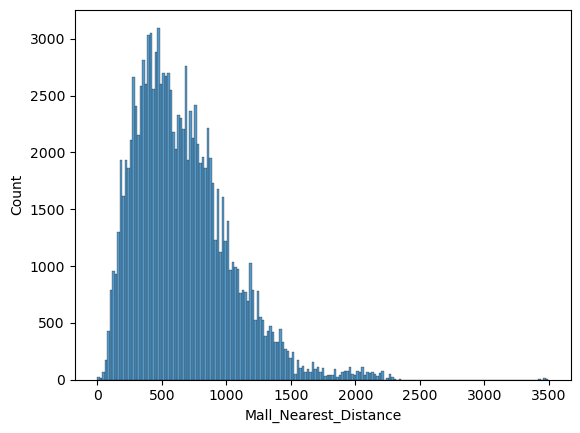

In [6]:
sns.histplot(x='Mall_Nearest_Distance',data = X_train)

From the histogram above, we can see the distribution of the feature is skewed right. As such , I will impute missing values using the median value instead of the mean as it is less sensitive to outliers.

In [7]:
imp_median = SimpleImputer(strategy='median')

In [8]:
X_train['Mall_Nearest_Distance_Imputed'] = imp_median.fit_transform(X_train['Mall_Nearest_Distance'].values.reshape(-1,1))

Imputing missing values for X_train

In [9]:
X_test['Mall_Nearest_Distance_Imputed'] = imp_median.transform(X_test['Mall_Nearest_Distance'].values.reshape(-1,1))

Repeating the same process for X_test

In [10]:
X_train = X_train.drop('Mall_Nearest_Distance',axis = 1)
X_test = X_test.drop('Mall_Nearest_Distance',axis = 1)

I can now drop the columns with missing values as I have the column with the imputed values.

## One-Hot Encoding Train and Test Sets

In [11]:
X_train_objs = X_train.select_dtypes(include='object')
X_train_nums = X_train.select_dtypes(exclude = 'object')

X_test_objs = X_test.select_dtypes(include='object')
X_test_nums = X_test.select_dtypes(exclude = 'object')

Splitting my x train and x test into objects and numerical columns to perform scaling and one hot encoding.

In [12]:
ohe = OneHotEncoder(drop='first',sparse_output=False)

In [13]:
ohe_X_train_objs = pd.DataFrame(ohe.fit_transform(X_train_objs))

In [14]:
ohe_X_train_objs.columns = ohe.get_feature_names_out(input_features=X_train_objs.columns)

In [15]:
ohe_X_train_objs

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,mrt_name_Ubi,mrt_name_Upper Changi,mrt_name_Woodlands,mrt_name_Woodlands North,mrt_name_Woodlands South,mrt_name_Woodleigh,mrt_name_Yew Tee,mrt_name_Yio Chu Kang,mrt_name_Yishun,mrt_name_one-north
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Categorical columns have now been one hot encoded and put back into a dataframe to merge back with the numerical columns later.

In [16]:
ohe_X_test_objs = pd.DataFrame(ohe.transform(X_test_objs))

In [17]:
ohe_X_test_objs.columns = ohe.get_feature_names_out(input_features=X_test_objs.columns)

In [18]:
ohe_X_test_objs

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,mrt_name_Ubi,mrt_name_Upper Changi,mrt_name_Woodlands,mrt_name_Woodlands North,mrt_name_Woodlands South,mrt_name_Woodleigh,mrt_name_Yew Tee,mrt_name_Yio Chu Kang,mrt_name_Yishun,mrt_name_one-north
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Repeating the same process for X test

## Scaling Train and Test Sets

In [19]:
X_train_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120507 entries, 107922 to 121958
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   floor_area_sqm                 120507 non-null  float64
 1   lease_commence_date            120507 non-null  int64  
 2   Tranc_Year                     120507 non-null  int64  
 3   Tranc_Month                    120507 non-null  int64  
 4   lower                          120507 non-null  int64  
 5   upper                          120507 non-null  int64  
 6   mid                            120507 non-null  int64  
 7   max_floor_lvl                  120507 non-null  int64  
 8   year_completed                 120507 non-null  int64  
 9   total_dwelling_units           120507 non-null  int64  
 10  1room_sold                     120507 non-null  int64  
 11  2room_sold                     120507 non-null  int64  
 12  3room_sold               

I realise that there are 4 numeric columns which are actually boolean values.

1. affiliation
2. pri_sch_affiliation
3. bus_interchange
4. mrt_interchange 

I don't want to scale boolean values as they are binary and scaling them will not represent the original data well. As such, I will be dropping these 4 columns before scaling the numeric columns and rejoining the 4 colums back together.

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train_nums = scaler.fit_transform(X_train_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1))

Fit Transforming my x train nums without the boolean value features.

In [22]:
scaled_X_train_nums = pd.DataFrame(scaled_X_train_nums,columns=X_train_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1).columns)

As the transformed values are in an array, I am putting the data back into a data frame and relabelling the columns.

In [23]:
scaled_X_train_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']] = X_train_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']].reset_index(drop=True)

Adding back the 4 boolean value columns.

In [24]:
scaled_X_train_nums.head()

,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,lower,upper,mid,max_floor_lvl,year_completed,total_dwelling_units,...,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,sec_sch_latitude,sec_sch_longitude,Mall_Nearest_Distance_Imputed,affiliation,pri_sch_affiliation,bus_interchange,mrt_interchange
0,-0.871090,-1.274507,-0.541554,-1.670383,-0.044711,-0.057839,-0.051300,-0.343280,-1.224483,0.983980,...,0.597569,-0.080688,0.691741,-1.133456,0.594585,0.704271,0,1,0,0
1,0.030637,-1.192042,1.275574,1.020394,-0.587205,-0.601074,-0.594473,-0.343280,-1.142459,1.309890,...,1.311111,-0.550911,-1.106348,-0.754181,1.323920,0.753246,0,0,0,0
2,-0.256276,-0.944646,-0.178129,-0.175507,-0.044711,-0.057839,-0.051300,-0.663891,-0.896387,0.263547,...,-0.065401,-0.405330,2.290042,0.181894,-0.068507,1.103466,1,1,1,0
3,0.399526,0.292333,1.639000,-1.670383,-0.044711,-0.057839,-0.051300,-0.984503,0.251949,-0.765644,...,1.688331,-0.582214,-1.106348,-0.216234,1.676024,1.814273,0,0,0,0
4,-1.526892,-2.099160,-0.541554,0.123468,-1.129699,-1.144309,-1.137646,0.137638,-2.208770,2.201856,...,-0.537839,-0.216145,0.192272,-1.536567,-0.516834,0.840046,0,0,0,0


Scaled X_train numerical columns with 4 boolean value columns added back.

In [25]:
scaled_X_test_nums = scaler.transform(X_test_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1))

In [26]:
scaled_X_test_nums = pd.DataFrame(scaled_X_test_nums,columns=X_test_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1).columns)

In [27]:
scaled_X_test_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']] = X_test_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']].reset_index(drop=True)

Repeating the process for my x_test numerical columns.

In [28]:
scaled_X_test_nums.head()

,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,lower,upper,mid,max_floor_lvl,year_completed,total_dwelling_units,...,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,sec_sch_latitude,sec_sch_longitude,Mall_Nearest_Distance_Imputed,affiliation,pri_sch_affiliation,bus_interchange,mrt_interchange
0,-0.297264,0.622194,-0.178129,-0.773457,-0.044711,-0.057839,-0.051300,-0.022668,0.662069,-0.216742,...,0.808877,-0.441314,-0.007516,0.709432,0.833551,-0.789013,0,0,1,1
1,1.014340,0.539729,-0.904980,-0.773457,-0.044711,-0.057839,-0.051300,0.137638,0.580045,-1.125861,...,0.831754,-0.743978,-0.556932,0.472071,0.813200,-0.385495,0,0,1,1
2,1.957055,0.044937,-0.178129,1.020394,0.497782,0.485395,0.491873,-0.343280,0.087901,-1.314546,...,0.119648,0.291703,0.042431,-0.567360,0.175790,0.250140,0,0,0,0
3,-1.321954,-1.356972,1.275574,1.020394,-0.044711,-0.057839,-0.051300,0.137638,-1.306507,0.898214,...,0.992374,1.179024,0.741688,-1.367587,1.065933,-0.429257,0,0,1,0
4,1.137303,0.044937,0.185297,-0.474482,0.497782,0.485395,0.491873,-0.343280,0.087901,-0.902869,...,1.511425,-0.353757,0.941476,-0.127344,1.608641,1.177478,0,0,0,0


## Merging Scaled and One-Hot Encoded Data

In [29]:
final_X_train = pd.concat([ohe_X_train_objs,scaled_X_train_nums],axis=1)

In [30]:
final_X_train

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,sec_sch_latitude,sec_sch_longitude,Mall_Nearest_Distance_Imputed,affiliation,pri_sch_affiliation,bus_interchange,mrt_interchange
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.597569,-0.080688,0.691741,-1.133456,0.594585,0.704271,0,1,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.311111,-0.550911,-1.106348,-0.754181,1.323920,0.753246,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.065401,-0.405330,2.290042,0.181894,-0.068507,1.103466,1,1,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.688331,-0.582214,-1.106348,-0.216234,1.676024,1.814273,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.537839,-0.216145,0.192272,-1.536567,-0.516834,0.840046,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.651459,0.735123,0.541900,-0.319499,-1.617479,-0.267273,0,0,0,0
120503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.510927,-0.338259,-0.656825,1.874702,-0.507553,-0.797682,0,0,0,0
120504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.230312,0.443481,-1.106348,2.048039,-0.341452,-1.072328,0,0,1,0
120505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717403,-1.313472,1.640732,0.532784,0.701661,0.008810,0,0,1,0


In [31]:
final_X_test = pd.concat([ohe_X_test_objs,scaled_X_test_nums],axis=1)

In [32]:
final_X_test

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,sec_sch_latitude,sec_sch_longitude,Mall_Nearest_Distance_Imputed,affiliation,pri_sch_affiliation,bus_interchange,mrt_interchange
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.808877,-0.441314,-0.007516,0.709432,0.833551,-0.789013,0,0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.831754,-0.743978,-0.556932,0.472071,0.813200,-0.385495,0,0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119648,0.291703,0.042431,-0.567360,0.175790,0.250140,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992374,1.179024,0.741688,-1.367587,1.065933,-0.429257,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.511425,-0.353757,0.941476,-0.127344,1.608641,1.177478,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.128452,-0.948986,-0.207303,-1.515977,-1.023096,-0.739238,0,0,1,0
30123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.837578,-0.775721,-1.106348,1.521490,-0.854959,-0.762048,0,0,0,0
30124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.734174,-0.313105,1.540838,-1.502652,-0.755621,0.093940,0,1,0,0
30125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.204734,0.172974,1.241157,-2.110038,-0.233128,0.336745,0,0,0,0


Final scaled and one-hot encoded X train and X test dataframes shown above.

# Model Fitting

## Baseline Model

In [33]:
lr_model = LinearRegression()

In [34]:
lr_model.fit(final_X_train,y_train)

LinearRegression()

In [35]:
print(f'R^2 score for training set is {lr_model.score(final_X_train,y_train)}')

R^2 score for training set is 0.9005704568396409


In [36]:
print(f'R^2 score for test set is {lr_model.score(final_X_test,y_test)}')

R^2 score for test set is 0.9014481142290208


In [37]:
print(f'Mean R^2 score with 5 fold cross validation on training set is {cross_val_score(lr_model,final_X_train,y_train,cv = 5).mean()}')

Mean R^2 score with 5 fold cross validation on training set is 0.900051166322673


From the R^2 score, we can see that the model is actually performing very well, with both training and test sets having an R^2 score higher than 0.9. There is no overfitting or underfitting.

The cross validation score is also almost exactly the same as the test score, which means that I have a representative test set and it is highly unlikely that there is sampling error.

In [41]:
y_pred = lr_model.predict(final_X_test)

In [42]:
print(f'MAE is {metrics.mean_absolute_error(y_test,y_pred)}')

MAE is 34185.836455339064


In [43]:
print(f'RMSE is {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

RMSE is 44827.78363705131


In [44]:
y_train.mean()

449417.36125984386

To further evaluate this model, I have used the metrics MAE, RMSE. Both performed significantly better than the mean of the y-train. Suggesting that the line of best fit is predicting the values well.

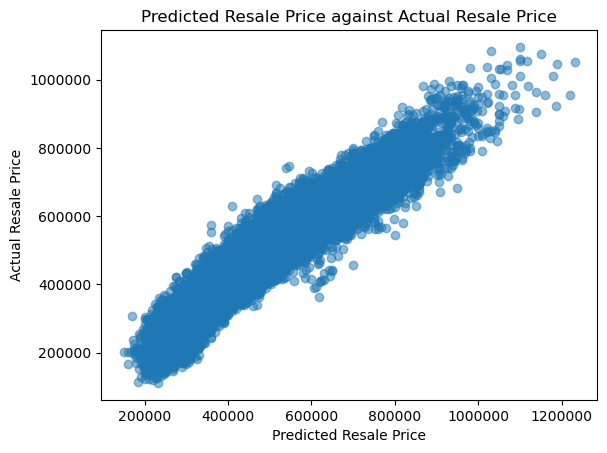

In [45]:
plt.figure(dpi=100)
plt.ticklabel_format(style='plain', axis = 'y')
plt.ticklabel_format(style='plain', axis = 'x')
plt.xlabel('Predicted Resale Price')
plt.ylabel('Actual Resale Price')
plt.title('Predicted Resale Price against Actual Resale Price')
plt.scatter(y_test, y_pred,alpha = 0.5);

Although the baseline model's results are very good, I will try to improve on it by using other more complex models

## Lasso Regression

In [46]:
lasso_model = LassoCV(max_iter = 10000,cv = 5, verbose = 1)

In [47]:
lasso_model.fit(final_X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


LassoCV(cv=5, max_iter=10000, verbose=1)

In [49]:
alpha = lasso_model.alpha_
alpha

93.68396660451357

This is the optimal alpha as decided by the model, which I will use to cross validate the score.

In [50]:
print(f'R^2 score for training set is {lasso_model.score(final_X_train,y_train)}')

R^2 score for training set is 0.8908561082694333


In [51]:
print(f'R^2 score for test set is {lasso_model.score(final_X_test,y_test)}')

R^2 score for test set is 0.8913479641514964


In [52]:
print(f'Mean R^2 score with optimal alpha value is {cross_val_score(Lasso(alpha=alpha),final_X_train,y_train,cv=5).mean()}')

Mean R^2 score with optimal alpha value is 0.890527143631229


From the R^2 score, we can see that the model is actually performing very well, with both training and test sets having an R^2 score higher than 0.89. There is no overfitting or underfitting.

The cross validation score is also almost exactly the same as the test score, which means that I have a representative test set and it is highly unlikely that there is sampling error.

In [59]:
y_pred = lasso_model.predict(final_X_test)

In [60]:
print(f'MAE is {metrics.mean_absolute_error(y_test,y_pred)}')

MAE is 35537.752772577966


In [61]:
print(f'RMSE is {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

RMSE is 47068.86562950841


In [62]:
y_train.mean()

449417.36125984386

The MAE and RMSE score is also significantly better than the mean of y train.

In [63]:
coef_values = pd.DataFrame(lasso_model.coef_,index = final_X_train.columns,columns=['coef_values']).T

In [64]:
coef_values

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,sec_sch_latitude,sec_sch_longitude,Mall_Nearest_Distance_Imputed,affiliation,pri_sch_affiliation,bus_interchange,mrt_interchange
coef_values,-46248.945827,80730.179525,-0.0,-22838.366171,-6911.674111,133207.546182,0.0,-22000.539823,11005.193725,-28092.384954,...,-0.0,4257.272887,0.0,0.0,0.0,-948.998001,14828.569552,-0.0,11803.518766,1167.094374


In [65]:
os.makedirs('../data/outputs', exist_ok=True)  
coef_values.to_csv('../data/outputs/coef_values.csv')

From the results above, the model performed slightly worse than the baseline model which is interesting as I expected alot of features to not be useful. 

Viewing the coefficients, I can see that the model did weigh certain features 0. I can take this information and remove the features completely and rerun the updated dataset through the models to see if it improves performance.

**I will export this DataFrame so that I can import it into the next notebook where I remove features to try and improve model performance.**

## Ridge Regression

In [66]:
r_alphas = np.logspace(0, 5, 100) # setting up my alphas to pass into the model

In [67]:
ridge_model = RidgeCV(alphas = r_alphas, scoring = 'r2', cv = 5)

In [68]:
ridge_model.fit(final_X_train,y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [69]:
alpha = ridge_model.alpha_
alpha

1.0

This is the optimal alpha as decided by the model, which I will use to cross validate the score.

In [70]:
print(f'R^2 score for training set is {ridge_model.score(final_X_train,y_train)}')

R^2 score for training set is 0.9005758625554359


In [71]:
print(f'R^2 score for test set is {ridge_model.score(final_X_test,y_test)}')

R^2 score for test set is 0.9014872346425724


In [72]:
print(f'Mean R^2 score with optimal alpha value is {cross_val_score(Ridge(alpha=alpha),final_X_train,y_train,cv=5).mean()}')

Mean R^2 score with optimal alpha value is 0.8963122731114372


From the R^2 score, we can see that the model is actually performing very well, with both training and test sets having an R^2 score higher than 0.9. There is no overfitting or underfitting.

The cross validation score is also almost exactly the same as the test score, which means that I have a representative test set and it is highly unlikely that there is sampling error.

In [73]:
y_pred = ridge_model.predict(final_X_test)

In [74]:
print(f'MAE is {metrics.mean_absolute_error(y_test,y_pred)}')

MAE is 34180.992942369776


In [75]:
print(f'RMSE is {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

RMSE is 44818.88550442122


In [76]:
y_train.mean()

449417.36125984386

The MAE and RMSE score is also significantly better than the mean of y train.

## ElasticNet Regression

In [77]:
en_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],max_iter = 10000,verbose = 1)

In [78]:
en_model.fit(final_X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
             verbose=1)

In [79]:
l1_ratio = en_model.l1_ratio_

ElasticNet model has selected an l1 ratio of 1 or pure lasso regression.

In [80]:
alpha = en_model.alpha_
alpha

93.68396660451357

This is the optimal alpha as decided by the model, which I will use to cross validate the score.

In [81]:
print(f'R^2 score for training set is {en_model.score(final_X_train,y_train)}')

R^2 score for training set is 0.8908561082694333


In [82]:
print(f'R^2 score for test set is {en_model.score(final_X_test,y_test)}')

R^2 score for test set is 0.8913479641514964


In [83]:
print(f'Mean R^2 score with optimal alpha value is {cross_val_score(ElasticNet(alpha=alpha,l1_ratio = l1_ratio),final_X_train,y_train,cv=5).mean()}')

Mean R^2 score with optimal alpha value is 0.890527143631229


From the R^2 score, we can see that the model is actually performing very well, with both training and test sets having an R^2 score higher than 0.89. There is no overfitting or underfitting.

The cross validation score is also almost exactly the same as the test score, which means that I have a representative test set and it is highly unlikely that there is sampling error.

In [84]:
y_pred = en_model.predict(final_X_test)

In [85]:
print(f'MAE is {metrics.mean_absolute_error(y_test,y_pred)}')

MAE is 35537.752772577966


In [86]:
print(f'RMSE is {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

RMSE is 47068.86562950841


In [87]:
y_train.mean()

449417.36125984386

The MAE and RMSE score is also significantly better than the mean of y train.

## Comparison of 4 Models 

In [89]:
print(" Multiple Linear Regression ".center(18, "="))# syntax: str.center(width, fillchar=' ')
print(lr_model.score(final_X_train, y_train))
print(lr_model.score(final_X_test, y_test))
print()
print(" Lasso ".center(18, "="))
print(lasso_model.score(final_X_train, y_train))
print(lasso_model.score(final_X_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_model.score(final_X_train, y_train))
print(ridge_model.score(final_X_test, y_test))
print()
print(" ElasticNet ".center(18, "="))
print(en_model.score(final_X_train, y_train))
print(en_model.score(final_X_test, y_test))

====== OLS =======
0.9005704568396409
0.9014481142290208

===== Lasso ======
0.8908561082694333
0.8913479641514964

===== Ridge ======
0.9005758625554359
0.9014872346425724

=== ElasticNet ===
0.8908561082694333
0.8913479641514964


| Model                                | R-Squared Score - Training Set | R-Squared Score - Test Set | Cross-Validated R-Squared Score folds = 5 | RMSE  |
|--------------------------------------|--------------------------------|----------------------------|-------------------------------------------|-------|
| Multiple Linear Regression                                  | 0.90                           | 0.90                       | 0.90                                      | 44827 |
| Lasso  alpha = 93.6                  | 0.89                           | 0.89                       | 0.89                                      | 47068 |
| Ridge alpha = 1                      | 0.90                           | 0.90                       | 0.90                                      | 44818 |
| ElasticNet l1_ratio = 1 alpha = 93.6 | 0.89                           | 0.89                       | 0.89                                      | 47068 |

From the R^2 scores of the first 4 models, all of them are actually pretty good. However, I will try to further improve on them, by doing the following:


1. Removing outlier years
1. Removing outlier datapoints
1. Removing features which were given 0 weight by lasso


This will be done in the next code notebook.